In [19]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import polars.selectors as cs
import streamlit as st

In [2]:
def create_ages(mu=50,sigma=13,num_samples=100,seed=42):
    np.random.seed(seed)

    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)

    return sample_ages

In [3]:
sample = create_ages()

In [4]:
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

In [5]:
sample = pl.DataFrame({"age":sample})

In [6]:
sample

age
f64
56.0
48.0
58.0
70.0
47.0
…
31.0
54.0
53.0


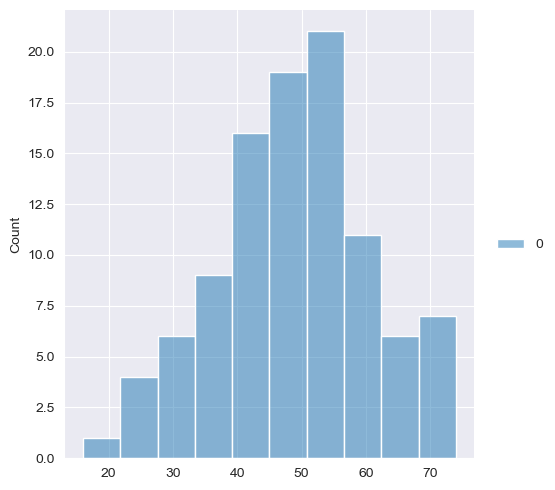

In [8]:
sns.displot(sample, bins=10, kde=False)

<Axes: >

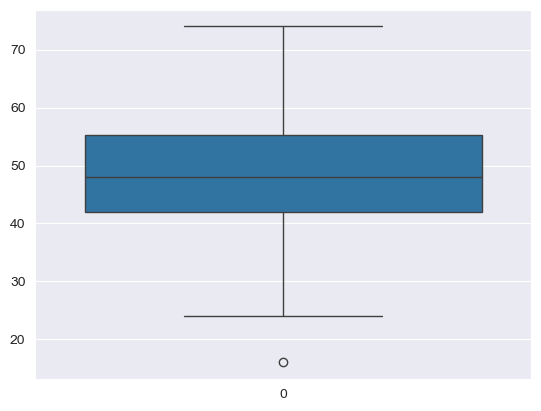

In [9]:
sns.boxplot(sample)

In [10]:
ser = sample

In [11]:
ser.describe()

statistic,age
str,f64
"""count""",100.0
"""null_count""",0.0
"""mean""",48.66
"""std""",11.82039
"""min""",16.0
"""25%""",42.0
"""50%""",48.0
"""75%""",55.0
"""max""",74.0


In [14]:
ser.filter(
    pl.col('age') > 10
)

age
f64
56.0
48.0
58.0
70.0
47.0
…
31.0
54.0
53.0


In [18]:
ser.with_columns(
    pl.when(pl.col('age') < 18 )
    .then(18)
    .otherwise(pl.col('age'))
    .alias('age')
)

age
f64
56.0
48.0
58.0
70.0
47.0
…
31.0
54.0
53.0


In [40]:
df = pl.read_csv("../../DATA/Ames_Housing_Data.csv")

In [41]:
df

PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,…,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
i64,i64,str,f64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,str,str,str,str,str,f64,str,str,str,str,str,str,str,f64,str,f64,…,i64,i64,i64,f64,f64,i64,i64,i64,i64,str,i64,str,i64,str,str,f64,str,f64,f64,str,str,str,i64,i64,i64,i64,i64,i64,str,str,str,i64,i64,i64,str,str,i64
526301100,20,"""RL""",141.0,31770,"""Pave""",null,"""IR1""","""Lvl""","""AllPub""","""Corner""","""Gtl""","""NAmes""","""Norm""","""Norm""","""1Fam""","""1Story""",6,5,1960,1960,"""Hip""","""CompShg""","""BrkFace""","""Plywood""","""Stone""",112.0,"""TA""","""TA""","""CBlock""","""TA""","""Gd""","""Gd""","""BLQ""",639.0,"""Unf""",0.0,…,0,0,1656,1.0,0.0,1,0,3,1,"""TA""",7,"""Typ""",2,"""Gd""","""Attchd""",1960.0,"""Fin""",2.0,528.0,"""TA""","""TA""","""P""",210,62,0,0,0,0,null,null,null,0,5,2010,"""WD ""","""Normal""",215000
526350040,20,"""RH""",80.0,11622,"""Pave""",null,"""Reg""","""Lvl""","""AllPub""","""Inside""","""Gtl""","""NAmes""","""Feedr""","""Norm""","""1Fam""","""1Story""",5,6,1961,1961,"""Gable""","""CompShg""","""VinylSd""","""VinylSd""","""None""",0.0,"""TA""","""TA""","""CBlock""","""TA""","""TA""","""No""","""Rec""",468.0,"""LwQ""",144.0,…,0,0,896,0.0,0.0,1,0,2,1,"""TA""",5,"""Typ""",0,null,"""Attchd""",1961.0,"""Unf""",1.0,730.0,"""TA""","""TA""","""Y""",140,0,0,0,120,0,null,"""MnPrv""",null,0,6,2010,"""WD ""","""Normal""",105000
526351010,20,"""RL""",81.0,14267,"""Pave""",null,"""IR1""","""Lvl""","""AllPub""","""Corner""","""Gtl""","""NAmes""","""Norm""","""Norm""","""1Fam""","""1Story""",6,6,1958,1958,"""Hip""","""CompShg""","""Wd Sdng""","""Wd Sdng""","""BrkFace""",108.0,"""TA""","""TA""","""CBlock""","""TA""","""TA""","""No""","""ALQ""",923.0,"""Unf""",0.0,…,0,0,1329,0.0,0.0,1,1,3,1,"""Gd""",6,"""Typ""",0,null,"""Attchd""",1958.0,"""Unf""",1.0,312.0,"""TA""","""TA""","""Y""",393,36,0,0,0,0,null,null,"""Gar2""",12500,6,2010,"""WD ""","""Normal""",172000
526353030,20,"""RL""",93.0,11160,"""Pave""",null,"""Reg""","""Lvl""","""AllPub""","""Corner""","""Gtl""","""NAmes""","""Norm""","""Norm""","""1Fam""","""1Story""",7,5,1968,1968,"""Hip""","""CompShg""","""BrkFace""","""BrkFace""","""None""",0.0,"""Gd""","""TA""","""CBlock""","""TA""","""TA""","""No""","""ALQ""",1065.0,"""Unf""",0.0,…,0,0,2110,1.0,0.0,2,1,3,1,"""Ex""",8,"""Typ""",2,"""TA""","""Attchd""",1968.0,"""Fin""",2.0,522.0,"""TA""","""TA""","""Y""",0,0,0,0,0,0,null,null,null,0,4,2010,"""WD ""","""Normal""",244000
527105010,60,"""RL""",74.0,13830,"""Pave""",null,"""IR1""","""Lvl""","""AllPub""","""Inside""","""Gtl""","""Gilbert""","""Norm""","""Norm""","""1Fam""","""2Story""",5,5,1997,1998,"""Gable""","""CompShg""","""VinylSd""","""VinylSd""","""None""",0.0,"""TA""","""TA""","""PConc""","""Gd""","""TA""","""No""","""GLQ""",791.0,"""Unf""",0.0,…,701,0,1629,0.0,0.0,2,1,3,1,"""TA""",6,"""Typ""",1,"""TA""","""Attchd""",1997.0,"""Fin""",2.0,482.0,"""TA""","""TA""","""Y""",212,34,0,0,0,0,null,"""MnPrv""",null,0,3,2010,"""WD ""","""Normal""",189900
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
923275080,80,"""RL""",

In [50]:
numeric_columns = df.select(cs.numeric())
sns.heatmap(numeric_columns.corr(), annot=True)

<Axes: >

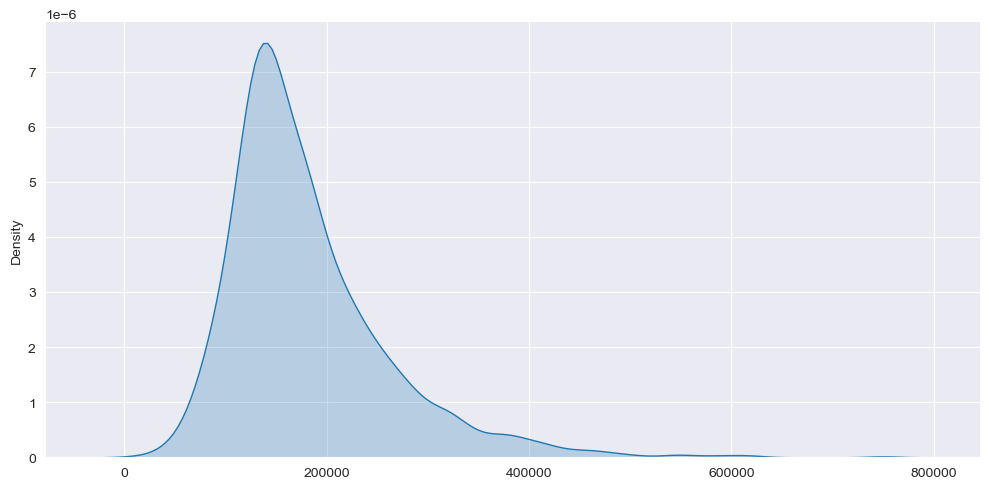

In [59]:
sns.displot(df['SalePrice'], kind='kde', fill=True, aspect=2)
plt.show()

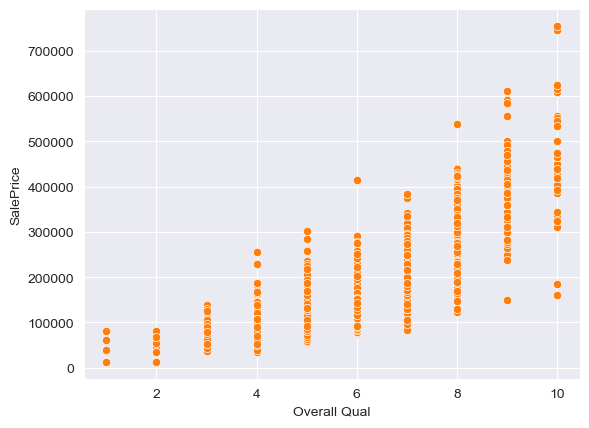

In [61]:
sns.scatterplot(data=df, x='Overall Qual', y='SalePrice')
plt.show()

In [64]:
df.filter(
    (pl.col('Overall Qual') > 8 ) & (pl.col('SalePrice') < 200_000)
)

PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,…,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
i64,i64,str,f64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,str,str,str,str,str,f64,str,str,str,str,str,str,str,f64,str,f64,…,i64,i64,i64,f64,f64,i64,i64,i64,i64,str,i64,str,i64,str,str,f64,str,f64,f64,str,str,str,i64,i64,i64,i64,i64,i64,str,str,str,i64,i64,i64,str,str,i64
533350090,60,"""RL""",null,24572,"""Pave""",null,"""IR1""","""Lvl""","""AllPub""","""CulDSac""","""Gtl""","""Veenker""","""Norm""","""Norm""","""1Fam""","""2Story""",9,3,1977,1977,"""Mansard""","""CompShg""","""Wd Sdng""","""Wd Sdng""","""BrkFace""",1050.0,"""Gd""","""Gd""","""CBlock""","""Gd""","""TA""","""No""","""GLQ""",410.0,"""Unf""",0.0,…,1345,0,2944,0.0,0.0,2,2,3,1,"""Gd""",9,"""Typ""",1,"""Gd""","""Attchd""",1977.0,"""RFn""",3.0,864.0,"""TA""","""TA""","""Y""",140,70,16,0,0,0,null,null,null,0,6,2008,"""WD ""","""Family""",150000
908154235,60,"""RL""",313.0,63887,"""Pave""",null,"""IR3""","""Bnk""","""AllPub""","""Corner""","""Gtl""","""Edwards""","""Feedr""","""Norm""","""1Fam""","""2Story""",10,5,2008,2008,"""Hip""","""ClyTile""","""Stucco""","""Stucco""","""Stone""",796.0,"""Ex""","""TA""","""PConc""","""Ex""","""TA""","""Gd""","""GLQ""",5644.0,"""Unf""",0.0,…,950,0,5642,2.0,0.0,2,1,3,1,"""Ex""",12,"""Typ""",3,"""Gd""","""Attchd""",2008.0,"""Fin""",2.0,1418.0,"""TA""","""TA""","""Y""",214,292,0,0,0,480,"""Gd""",null,null,0,1,2008,"""New""","""Partial""",160000
908154195,20,"""RL""",128.0,39290,"""Pave""",null,"""IR1""","""Bnk""","""AllPub""","""Inside""","""Gtl""","""Edwards""","""Norm""","""Norm""","""1Fam""","""1Story""",10,5,2008,2009,"""Hip""","""CompShg""","""CemntBd""","""CmentBd""","""Stone""",1224.0,"""Ex""","""TA""","""PConc""","""Ex""","""TA""","""Gd""","""GLQ""",4010.0,"""Unf""",0.0,…,0,0,5095,1.0,1.0,2,1,2,1,"""Ex""",15,"""Typ""",2,"""Gd""","""Attchd""",2008.0,"""Fin""",3.0,1154.0,"""TA""","""TA""","""Y""",546,484,0,0,0,0,null,null,"""Elev""",17000,10,2007,"""New""","""Partial""",183850
908154205,60,"""RL""",130.0,40094,"""Pave""",null,"""IR1""","""Bnk""","""AllPub""","""Inside""","""Gtl""","""Edwards""","""PosN""","""PosN""","""1Fam""","""2Story""",10,5,2007,2008,"""Hip""","""CompShg""","""CemntBd""","""CmentBd""","""Stone""",762.0,"""Ex""","""TA""","""PConc""","""Ex""","""TA""","""Gd""","""GLQ""",2260.0,"""Unf""",0.0,…,1538,0,4676,1.0,0.0,3,1,3,1,"""Ex""",11,"""Typ""",1,"""Gd""","""BuiltIn""",2007.0,"""Fin""",3.0,884.0,"""TA""","""TA""","""Y""",208,406,0,0,0,0,null,null,null,0,10,2007,"""New""","""Partial""",184750


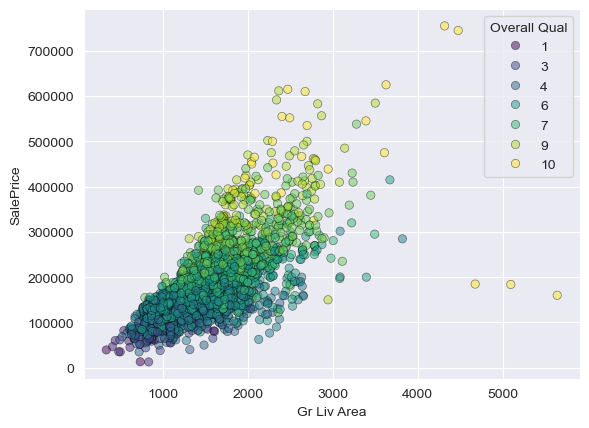

In [72]:
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice', hue='Overall Qual', palette='viridis', alpha=0.5, edgecolor='black')
plt.show()

In [74]:
df.filter(
    (pl.col('Gr Liv Area') > 4000 ) & (pl.col('SalePrice') < 400_000)
)

PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,…,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
i64,i64,str,f64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,str,str,str,str,str,f64,str,str,str,str,str,str,str,f64,str,f64,…,i64,i64,i64,f64,f64,i64,i64,i64,i64,str,i64,str,i64,str,str,f64,str,f64,f64,str,str,str,i64,i64,i64,i64,i64,i64,str,str,str,i64,i64,i64,str,str,i64
908154235,60,"""RL""",313.0,63887,"""Pave""",null,"""IR3""","""Bnk""","""AllPub""","""Corner""","""Gtl""","""Edwards""","""Feedr""","""Norm""","""1Fam""","""2Story""",10,5,2008,2008,"""Hip""","""ClyTile""","""Stucco""","""Stucco""","""Stone""",796.0,"""Ex""","""TA""","""PConc""","""Ex""","""TA""","""Gd""","""GLQ""",5644.0,"""Unf""",0.0,…,950,0,5642,2.0,0.0,2,1,3,1,"""Ex""",12,"""Typ""",3,"""Gd""","""Attchd""",2008.0,"""Fin""",2.0,1418.0,"""TA""","""TA""","""Y""",214,292,0,0,0,480,"""Gd""",null,null,0,1,2008,"""New""","""Partial""",160000
908154195,20,"""RL""",128.0,39290,"""Pave""",null,"""IR1""","""Bnk""","""AllPub""","""Inside""","""Gtl""","""Edwards""","""Norm""","""Norm""","""1Fam""","""1Story""",10,5,2008,2009,"""Hip""","""CompShg""","""CemntBd""","""CmentBd""","""Stone""",1224.0,"""Ex""","""TA""","""PConc""","""Ex""","""TA""","""Gd""","""GLQ""",4010.0,"""Unf""",0.0,…,0,0,5095,1.0,1.0,2,1,2,1,"""Ex""",15,"""Typ""",2,"""Gd""","""Attchd""",2008.0,"""Fin""",3.0,1154.0,"""TA""","""TA""","""Y""",546,484,0,0,0,0,null,null,"""Elev""",17000,10,2007,"""New""","""Partial""",183850
908154205,60,"""RL""",130.0,40094,"""Pave""",null,"""IR1""","""Bnk""","""AllPub""","""Inside""","""Gtl""","""Edwards""","""PosN""","""PosN""","""1Fam""","""2Story""",10,5,2007,2008,"""Hip""","""CompShg""","""CemntBd""","""CmentBd""","""Stone""",762.0,"""Ex""","""TA""","""PConc""","""Ex""","""TA""","""Gd""","""GLQ""",2260.0,"""Unf""",0.0,…,1538,0,4676,1.0,0.0,3,1,3,1,"""Ex""",11,"""Typ""",1,"""Gd""","""BuiltIn""",2007.0,"""Fin""",3.0,884.0,"""TA""","""TA""","""Y""",208,406,0,0,0,0,null,null,null,0,10,2007,"""New""","""Partial""",184750


In [77]:
df.filter(
    (pl.col('Gr Liv Area') > 4000 ) & (pl.col('SalePrice') < 400_000)
)

PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,…,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
i64,i64,str,f64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,str,str,str,str,str,f64,str,str,str,str,str,str,str,f64,str,f64,…,i64,i64,i64,f64,f64,i64,i64,i64,i64,str,i64,str,i64,str,str,f64,str,f64,f64,str,str,str,i64,i64,i64,i64,i64,i64,str,str,str,i64,i64,i64,str,str,i64
908154235,60,"""RL""",313.0,63887,"""Pave""",null,"""IR3""","""Bnk""","""AllPub""","""Corner""","""Gtl""","""Edwards""","""Feedr""","""Norm""","""1Fam""","""2Story""",10,5,2008,2008,"""Hip""","""ClyTile""","""Stucco""","""Stucco""","""Stone""",796.0,"""Ex""","""TA""","""PConc""","""Ex""","""TA""","""Gd""","""GLQ""",5644.0,"""Unf""",0.0,…,950,0,5642,2.0,0.0,2,1,3,1,"""Ex""",12,"""Typ""",3,"""Gd""","""Attchd""",2008.0,"""Fin""",2.0,1418.0,"""TA""","""TA""","""Y""",214,292,0,0,0,480,"""Gd""",null,null,0,1,2008,"""New""","""Partial""",160000
908154195,20,"""RL""",128.0,39290,"""Pave""",null,"""IR1""","""Bnk""","""AllPub""","""Inside""","""Gtl""","""Edwards""","""Norm""","""Norm""","""1Fam""","""1Story""",10,5,2008,2009,"""Hip""","""CompShg""","""CemntBd""","""CmentBd""","""Stone""",1224.0,"""Ex""","""TA""","""PConc""","""Ex""","""TA""","""Gd""","""GLQ""",4010.0,"""Unf""",0.0,…,0,0,5095,1.0,1.0,2,1,2,1,"""Ex""",15,"""Typ""",2,"""Gd""","""Attchd""",2008.0,"""Fin""",3.0,1154.0,"""TA""","""TA""","""Y""",546,484,0,0,0,0,null,null,"""Elev""",17000,10,2007,"""New""","""Partial""",183850
908154205,60,"""RL""",130.0,40094,"""Pave""",null,"""IR1""","""Bnk""","""AllPub""","""Inside""","""Gtl""","""Edwards""","""PosN""","""PosN""","""1Fam""","""2Story""",10,5,2007,2008,"""Hip""","""CompShg""","""CemntBd""","""CmentBd""","""Stone""",762.0,"""Ex""","""TA""","""PConc""","""Ex""","""TA""","""Gd""","""GLQ""",2260.0,"""Unf""",0.0,…,1538,0,4676,1.0,0.0,3,1,3,1,"""Ex""",11,"""Typ""",1,"""Gd""","""BuiltIn""",2007.0,"""Fin""",3.0,884.0,"""TA""","""TA""","""Y""",208,406,0,0,0,0,null,null,null,0,10,2007,"""New""","""Partial""",184750


In [85]:
df = df.filter(
    ~(pl.col('Gr Liv Area') > 4000 ) & (pl.col('SalePrice') < 400_000)
).select(cs.all())

In [87]:
df

PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,…,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
i64,i64,str,f64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,str,str,str,str,str,f64,str,str,str,str,str,str,str,f64,str,f64,…,i64,i64,i64,f64,f64,i64,i64,i64,i64,str,i64,str,i64,str,str,f64,str,f64,f64,str,str,str,i64,i64,i64,i64,i64,i64,str,str,str,i64,i64,i64,str,str,i64
526301100,20,"""RL""",141.0,31770,"""Pave""",null,"""IR1""","""Lvl""","""AllPub""","""Corner""","""Gtl""","""NAmes""","""Norm""","""Norm""","""1Fam""","""1Story""",6,5,1960,1960,"""Hip""","""CompShg""","""BrkFace""","""Plywood""","""Stone""",112.0,"""TA""","""TA""","""CBlock""","""TA""","""Gd""","""Gd""","""BLQ""",639.0,"""Unf""",0.0,…,0,0,1656,1.0,0.0,1,0,3,1,"""TA""",7,"""Typ""",2,"""Gd""","""Attchd""",1960.0,"""Fin""",2.0,528.0,"""TA""","""TA""","""P""",210,62,0,0,0,0,null,null,null,0,5,2010,"""WD ""","""Normal""",215000
526350040,20,"""RH""",80.0,11622,"""Pave""",null,"""Reg""","""Lvl""","""AllPub""","""Inside""","""Gtl""","""NAmes""","""Feedr""","""Norm""","""1Fam""","""1Story""",5,6,1961,1961,"""Gable""","""CompShg""","""VinylSd""","""VinylSd""","""None""",0.0,"""TA""","""TA""","""CBlock""","""TA""","""TA""","""No""","""Rec""",468.0,"""LwQ""",144.0,…,0,0,896,0.0,0.0,1,0,2,1,"""TA""",5,"""Typ""",0,null,"""Attchd""",1961.0,"""Unf""",1.0,730.0,"""TA""","""TA""","""Y""",140,0,0,0,120,0,null,"""MnPrv""",null,0,6,2010,"""WD ""","""Normal""",105000
526351010,20,"""RL""",81.0,14267,"""Pave""",null,"""IR1""","""Lvl""","""AllPub""","""Corner""","""Gtl""","""NAmes""","""Norm""","""Norm""","""1Fam""","""1Story""",6,6,1958,1958,"""Hip""","""CompShg""","""Wd Sdng""","""Wd Sdng""","""BrkFace""",108.0,"""TA""","""TA""","""CBlock""","""TA""","""TA""","""No""","""ALQ""",923.0,"""Unf""",0.0,…,0,0,1329,0.0,0.0,1,1,3,1,"""Gd""",6,"""Typ""",0,null,"""Attchd""",1958.0,"""Unf""",1.0,312.0,"""TA""","""TA""","""Y""",393,36,0,0,0,0,null,null,"""Gar2""",12500,6,2010,"""WD ""","""Normal""",172000
526353030,20,"""RL""",93.0,11160,"""Pave""",null,"""Reg""","""Lvl""","""AllPub""","""Corner""","""Gtl""","""NAmes""","""Norm""","""Norm""","""1Fam""","""1Story""",7,5,1968,1968,"""Hip""","""CompShg""","""BrkFace""","""BrkFace""","""None""",0.0,"""Gd""","""TA""","""CBlock""","""TA""","""TA""","""No""","""ALQ""",1065.0,"""Unf""",0.0,…,0,0,2110,1.0,0.0,2,1,3,1,"""Ex""",8,"""Typ""",2,"""TA""","""Attchd""",1968.0,"""Fin""",2.0,522.0,"""TA""","""TA""","""Y""",0,0,0,0,0,0,null,null,null,0,4,2010,"""WD ""","""Normal""",244000
527105010,60,"""RL""",74.0,13830,"""Pave""",null,"""IR1""","""Lvl""","""AllPub""","""Inside""","""Gtl""","""Gilbert""","""Norm""","""Norm""","""1Fam""","""2Story""",5,5,1997,1998,"""Gable""","""CompShg""","""VinylSd""","""VinylSd""","""None""",0.0,"""TA""","""TA""","""PConc""","""Gd""","""TA""","""No""","""GLQ""",791.0,"""Unf""",0.0,…,701,0,1629,0.0,0.0,2,1,3,1,"""TA""",6,"""Typ""",1,"""TA""","""Attchd""",1997.0,"""Fin""",2.0,482.0,"""TA""","""TA""","""Y""",212,34,0,0,0,0,null,"""MnPrv""",null,0,3,2010,"""WD ""","""Normal""",189900
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
923275080,80,"""RL""",

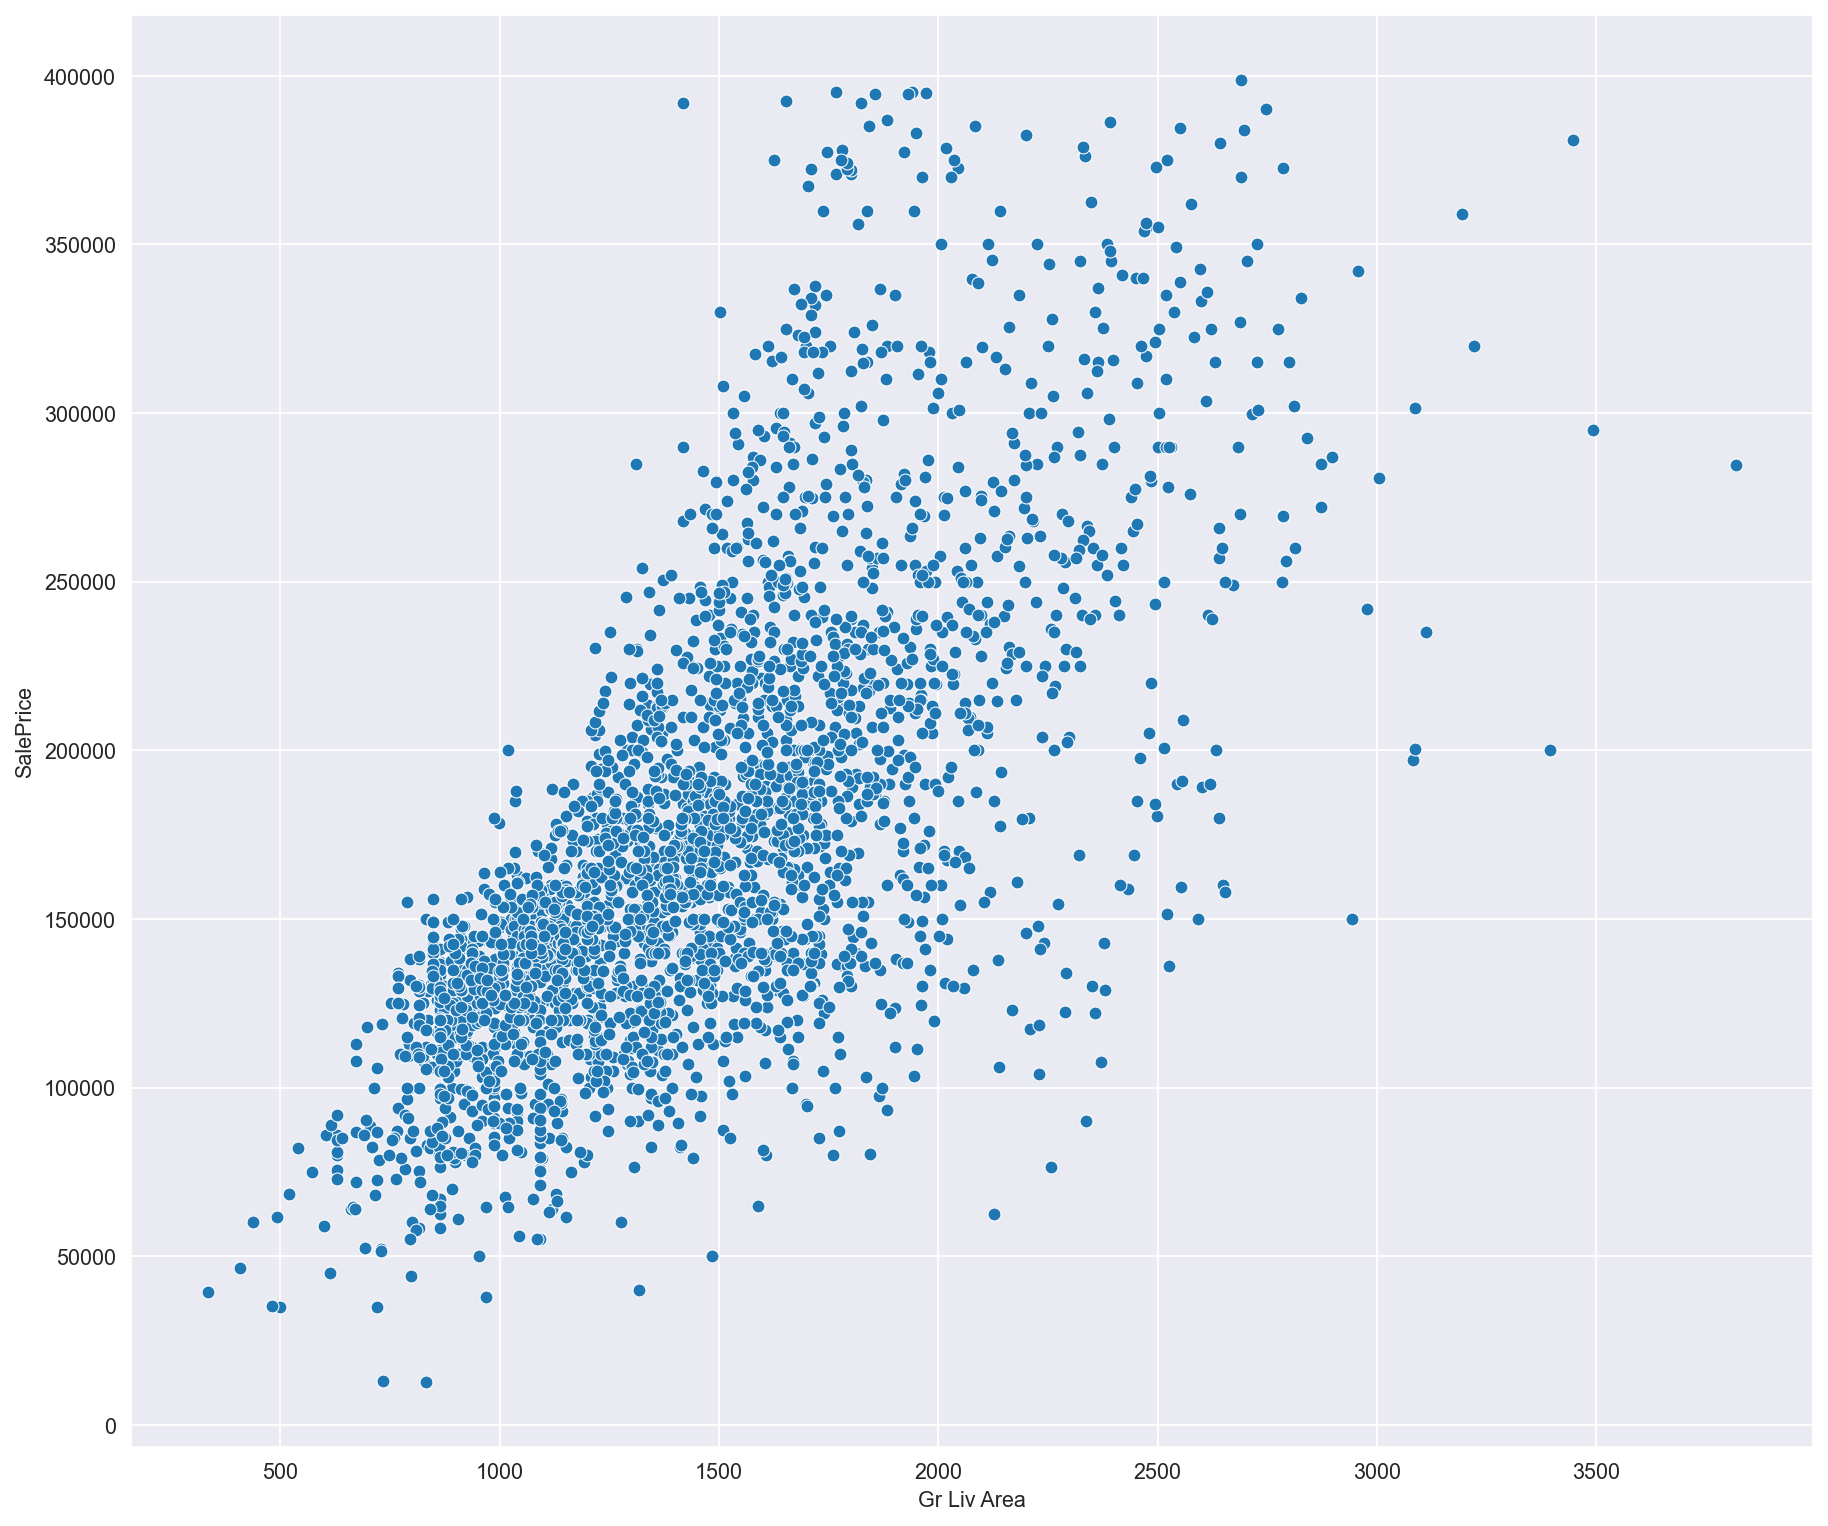

In [97]:
plt.figure(figsize=(14,12), dpi=155)
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice')
plt.show()

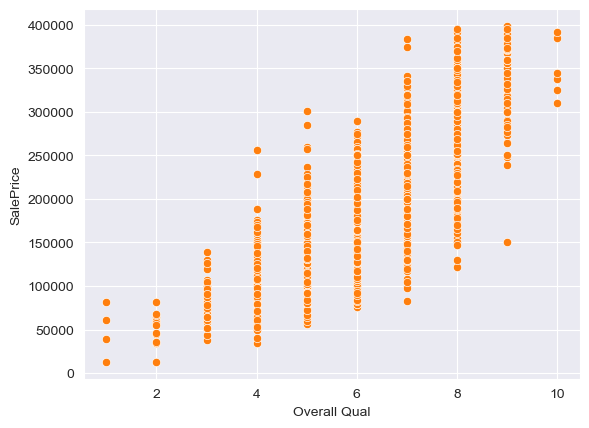

In [99]:
sns.scatterplot(data=df, x='Overall Qual', y='SalePrice')
plt.show()